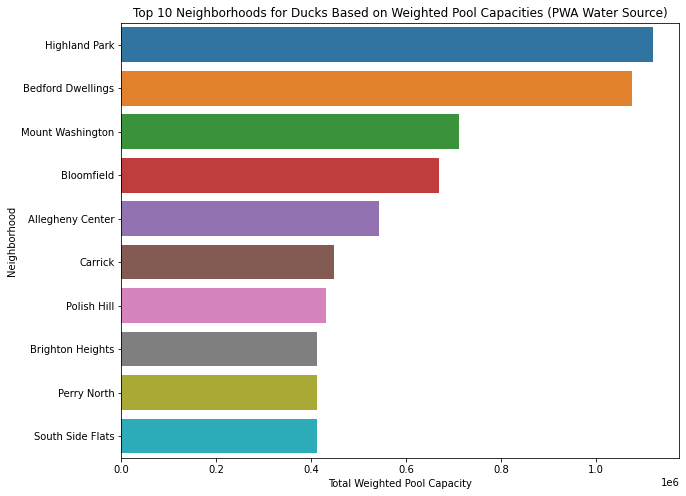

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './pittsburgh_pools.csv'
pools_data = pd.read_csv(file_path)
pwa_pools = pools_data[pools_data['water_source'] == 'Pittsburgh Water and Sewer Authority']

pwa_pools = pwa_pools.dropna(subset=['capacity'])
pwa_pools['weighted_capacity'] = pwa_pools.apply(
    lambda row: row['capacity'] * 2 if row['type'] == 'Pool' else row['capacity'], axis=1)

neighborhood_scores = pwa_pools.groupby('neighborhood')['weighted_capacity'].sum().reset_index()

sorted_neighborhoods = neighborhood_scores.sort_values(by='weighted_capacity', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='weighted_capacity', y='neighborhood', data=sorted_neighborhoods.head(10))
plt.title('Top 10 Neighborhoods for Ducks Based on Weighted Pool Capacities (PWA Water Source)')
plt.xlabel('Total Weighted Pool Capacity')
plt.ylabel('Neighborhood')
plt.show()